# **Step 1: Install Libraries**

First, we'll install the necessary libraries.

In [17]:
!pip install tensorflow
!pip install matplotlib
!pip install numpy

# **Step 2: Import Libraries**

Import the necessary libraries

In [18]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np

# **Step 3: Load and Preprocess the Dataset**

The CIFAR-10 dataset will be used for this project. It contains 60,000 32x32 color images across 10 different classes.

In [19]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize the images to a range of 0 to 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


# **Step 4: Build the CNN Model**

Next, define the architecture of your Convolutional Neural Network (CNN). The model will consist of convolutional layers followed by pooling layers and fully connected layers.

In [20]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 classes for CIFAR-10
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **Step 5: Compile the Model**

Now compile the model with an optimizer, a loss function, and metrics to track.

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# **Step 6: Train the Model**

Train the model on the training data. This process involves iterating over the dataset for a specified number of epochs.

In [22]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 49ms/step - accuracy: 0.3346 - loss: 1.7855 - val_accuracy: 0.5215 - val_loss: 1.3240
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.5631 - loss: 1.2196 - val_accuracy: 0.6017 - val_loss: 1.1414
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.6299 - loss: 1.0426 - val_accuracy: 0.6274 - val_loss: 1.0836
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.6732 - loss: 0.9380 - val_accuracy: 0.6669 - val_loss: 0.9595
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.7027 - loss: 0.8487 - val_accuracy: 0.6772 - val_loss: 0.9374
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 51ms/step - accuracy: 0.7232 - loss: 0.7941 - val_accuracy: 0.6818 - val_loss: 0.9343
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 48ms/step - accuracy: 0.7385 - loss: 0.7424 - val_accuracy: 0.6925 - val_loss: 0.8831
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 49ms/step - accuracy: 0.7558 -

# **Step 7: Evaluate the Model**

After training, evaluate the model's performance on the test data.

In [23]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 5s - 15ms/step - accuracy: 0.7043 - loss: 0.8889

Test accuracy: 0.7042999863624573


# **Step 8: Visualize the Results**

Plot the training and validation accuracy and loss over epochs

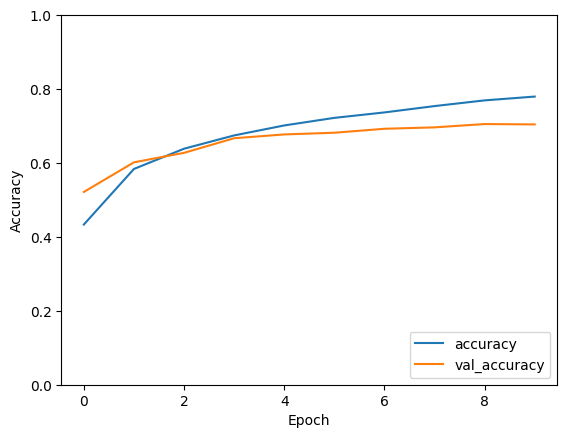

In [39]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# **Step 9: Save the Model**

Once the model is trained and evaluated, save it for future use.

In [24]:
model.save('image_classifier_model.h5')

# **Step 10: Upload and Predict on New Images**

1.   **Upload an image** to test the model and preprocess it to fit the model's input shape.



In [40]:
# Upload an image
uploaded = files.upload()

# Load the image and resize it to 32x32
img = image.load_img(list(uploaded.keys())[0], target_size=(32, 32))

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Normalize the image
img_array = img_array / 255.0

# Expand dimensions to match the input shape (1, 32, 32, 3)
img_array = np.expand_dims(img_array, axis=0)

Saving heavy_loader.jpg to heavy_loader.jpg


2. **Load the saved model**

In [26]:
model = tf.keras.models.load_model('image_classifier_model.h5')

3. **Make Predictions:** Use the model to predict the class of the uploaded image

In [41]:
predictions = model.predict(img_array)

# Get the index of the highest probability class
predicted_class = np.argmax(predictions)

# Load the CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print(f'The uploaded image is a: {class_names[predicted_class]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The uploaded image is a: truck
